# Installing Modules and Importing Libraries

In [2]:
# !pip3 install openpyxl

In [3]:
# !pip3 install opendatasets

In [4]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import mutual_info_classif
import opendatasets as od
import openpyxl

# Importing Dataset

In [5]:
# od.download("https://www.kaggle.com/datasets/muratkokludataset/dry-bean-dataset")

In [54]:
#reading the imported dataset
df = pd.read_excel("./dry-bean-dataset/Dry_Bean_Dataset/Dry_Bean_Dataset.xlsx")

In [55]:
df.shape

(13611, 17)

## Classes of our dataset

In [56]:
df["Class"].unique()

array(['SEKER', 'BARBUNYA', 'BOMBAY', 'CALI', 'HOROZ', 'SIRA', 'DERMASON'],
      dtype=object)

## Dropping rows to obtain a dataset with only 3 classes

In [57]:
df = df.drop(df[df["Class"].isin(['CALI', 'HOROZ' , 'SIRA', 'DERMASON'])].index)

In [58]:
df.shape

(3871, 17)

# Preprocessing data

## Converting classes to numeric values

In [59]:
from sklearn.preprocessing import LabelEncoder

In [60]:
le = LabelEncoder()
le.fit(['SEKER', 'BARBUNYA', 'BOMBAY'])
le.classes_

array(['BARBUNYA', 'BOMBAY', 'SEKER'], dtype='<U8')

In [61]:
y_train = le.transform(df['Class'])

In [62]:
y_train = pd.DataFrame(y_train)
y_train.head(10)

,0
0,2
1,2
2,2
3,2
4,2
5,2
6,2
7,2
8,2
9,2


In [63]:
y_train.shape

(3871, 1)

In [64]:
df = df.drop(["Class"], axis=1)
df.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166


In [65]:
df.shape

(3871, 16)

## Normalization

In [66]:
# from sklearn.preprocessing import MinMaxScaler 
from sklearn import preprocessing

In [67]:
# #columns to normalize
# columns_to_normalize = ['Area', 'Perimeter', 'MajorAxisLength' , 'AspectRation', 'ConvexArea', 'EquivDiameter']

In [68]:
# scaler = MinMaxScaler()
# df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])

In [69]:
scaler = preprocessing.StandardScaler().fit(df)
df_scaled = scaler.transform(df)

# Linear Regression

In [107]:
# Importing Libraries
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from sklearn.model_selection import train_test_split

In [108]:
# Split the data into training/testing sets
X1_train, X1_test, y1_train, y1_test = train_test_split(df_scaled, y_train, test_size=0.2, random_state=42) 

## Running Cross Validation on the Training Data

In [109]:
#importing library for cross validation
from sklearn.model_selection import cross_val_score

In [110]:
#K-fold cross validation

# model = decision tree classifier model
# X_train = training dataset
# y_train = target column of training dataset
# k = number of folds

def cross_validation(model, X_train, y_train, k):
  # Applying 10-Fold Cross Validation
    scores = cross_val_score(model, X_train, y_train, cv = k, scoring='neg_mean_squared_error')
    print('Average cross-validation MSE score: {:.4f}'.format(scores.mean() * (-1))) 

In [111]:
#Initializing model
lr_cv = linear_model.LinearRegression()
cross_validation(lr_cv, X1_train, y1_train.values.ravel(), 10)

Average cross-validation MSE score: 0.1063


In [112]:
# import sklearn
# sklearn.metrics.get_scorer_names()

## Running on train and test data

In [113]:
# Create linear regression object
lr = linear_model.LinearRegression()

# Train the model using the training sets
lr.fit(X1_train, y1_train.values.ravel())

# Make predictions using the testing set
y_pred = lr.predict(X1_test)


In [114]:
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y1_test.values.ravel(), y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y1_test.values.ravel(), y_pred))

Mean squared error: 0.10
Coefficient of determination: 0.88


# Logistic Regression 

In [115]:
from sklearn.linear_model import LogisticRegression

## Running Cross Validation on the Training Data

In [116]:
#Initializing model
log_r_cv = LogisticRegression()
cross_validation(log_r_cv, X1_train, y1_train.values.ravel(), 10)

Average cross-validation MSE score: 0.0452


## Running on train and test data

In [117]:
# Create logistic regression object
log_r_model = LogisticRegression()

# Train the model using the training sets
log_r_model.fit(X1_train, y1_train.values.ravel())

# Make predictions using the testing set
y1_pred = log_r_model.predict(X1_test)

In [118]:
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y1_test.values.ravel(), y1_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y1_test.values.ravel(), y1_pred))

Mean squared error: 0.06
Coefficient of determination: 0.93


# Experimenting with different hyper parameter combinations using Grid Search

In [125]:
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [129]:
def print_result(result):
    print("BEST PARAMS: {} \n".format(result.best_params_))

    #prints average and standard deviation of accuracy scores across sections/grids
    means = result.cv_results_['mean_test_score']
    params = result.cv_results_['params']
    print("Mean MSE of hyperparameter combinations:")
    for mean, param in zip(means, params):
        print('{}  -> {}'.format(round(mean,4)*(-1), param))
        print()

## Penalty

In [136]:
lr1 = LogisticRegression()
parameters = {
    'penalty': ['none', 'l2']  
}

cv = GridSearchCV(lr1, parameters, scoring='neg_mean_squared_error', cv=10)

#converting labels from column vector to array
cv.fit(X1_train, y1_train.values.ravel())

print_result(cv)

BEST PARAMS: {'penalty': 'l2'} 

Mean MSE of hyperparameter combinations:
0.0465  -> {'penalty': 'none'}

0.0452  -> {'penalty': 'l2'}



## Number of Iterations

In [145]:
lr1 = LogisticRegression()
parameters = {
    'max_iter': [10, 50, 100, 200, 300]
}

cv = GridSearchCV(lr1, parameters, scoring='neg_mean_squared_error', cv=10)

#converting labels from column vector to array
cv.fit(X1_train, y1_train.values.ravel())

print_result(cv)

BEST PARAMS: {'max_iter': 50} 

Mean MSE of hyperparameter combinations:
0.0468  -> {'max_iter': 10}

0.0452  -> {'max_iter': 50}

0.0452  -> {'max_iter': 100}

0.0452  -> {'max_iter': 200}

0.0452  -> {'max_iter': 300}



## Solver

In [138]:
lr1 = LogisticRegression()
parameters = {
    'solver': ['liblinear', 'lbfgs', 'saga']
}

cv = GridSearchCV(lr1, parameters, scoring='neg_mean_squared_error', cv=10)

#converting labels from column vector to array
cv.fit(X1_train, y1_train.values.ravel())

print_result(cv)

BEST PARAMS: {'solver': 'saga'} 

Mean MSE of hyperparameter combinations:
0.0465  -> {'solver': 'liblinear'}

0.0452  -> {'solver': 'lbfgs'}

0.0439  -> {'solver': 'saga'}



## Class weight

In [143]:
lr1 = LogisticRegression()
parameters = {
    'class_weight': [None, 'balanced'] 
}

cv = GridSearchCV(lr1, parameters, scoring='neg_mean_squared_error', cv=10)

#converting labels from column vector to array
cv.fit(X1_train, y1_train.values.ravel())

print_result(cv)

BEST PARAMS: {'class_weight': None} 

Mean MSE of hyperparameter combinations:
0.0452  -> {'class_weight': None}

0.053  -> {'class_weight': 'balanced'}



## C : Inverse of regularization strength

In [146]:
lr1 = LogisticRegression()
parameters = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100]
}

cv = GridSearchCV(lr1, parameters, scoring='neg_mean_squared_error', cv=10)

#converting labels from column vector to array
cv.fit(X1_train, y1_train.values.ravel())

print_result(cv)

BEST PARAMS: {'C': 1} 

Mean MSE of hyperparameter combinations:
0.0811  -> {'C': 0.001}

0.0478  -> {'C': 0.01}

0.0452  -> {'C': 0.1}

0.0452  -> {'C': 1}

0.0465  -> {'C': 10}

0.0452  -> {'C': 100}



### NOTE: 
- sklearn.linear_model.LogisticRegression doesn't use SGD, so there's no learning rate hyperparameter.
- Logistic regression in scikit-learn is typically trained using optimization algorithms like L-BFGS, which do not involve the concept of batches.

# Visualization of data in 2D and 3D space

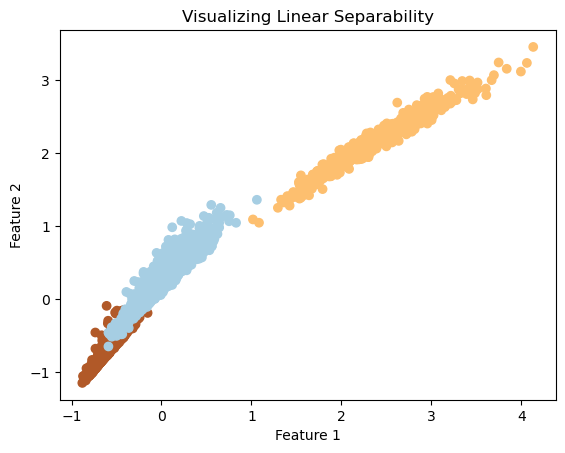

In [155]:
# Visualize the data (2D)
plt.scatter(df_scaled[:, 0], df_scaled[:, 1], c=y_train, cmap=plt.cm.Paired, marker='o')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Visualizing Linear Separability')
plt.show()

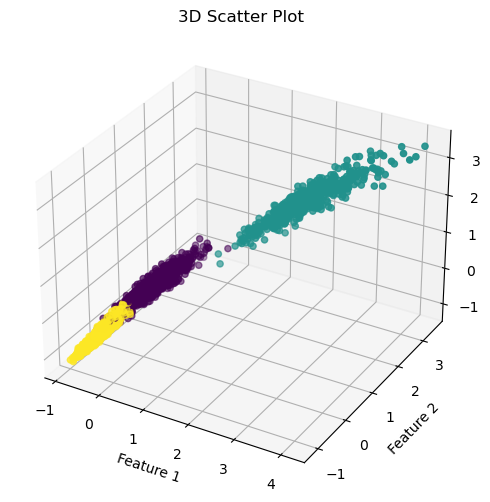

In [156]:
# Creating a 3D scatter plot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
ax.scatter(df_scaled[:, 0], df_scaled[:, 1], df_scaled[:, 2], c=y_train, marker='o', cmap='viridis')

# Set labels
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')
ax.set_title('3D Scatter Plot')

# Show the plot
plt.show()